#Time Series Analysis and Temperature Forcast

## Mounting Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Required Libraries



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Timeseries Forcast/timeseriesdatadate.csv')

In [ ]:
df.head()

,Date,Max,Min
0,01-01-1900,10.34,9.93
1,02-01-1900,9.85,9.55
2,03-01-1900,9.39,8.80
3,04-01-1900,8.95,8.95
4,05-01-1900,8.53,8.30


In [ ]:
df.dtypes

Date     object
Max     float64
Min     float64
dtype: object

In [ ]:
df.shape

(2479, 3)

### Renamed Columns

In [ ]:
df.rename(columns ={'Date':'date','Max':'temp_max','Min':'temp_min'},inplace=True)
df.tail()

,date,temp_max,temp_min
2474,10-10-1906,18.55,17.65
2475,11-10-1906,19.20,18.20
2476,12-10-1906,19.00,18.25
2477,13-10-1906,18.90,18.35
2478,14-10-1906,18.30,17.25


### Plotting Data of Maximum and Minimum Temperature 

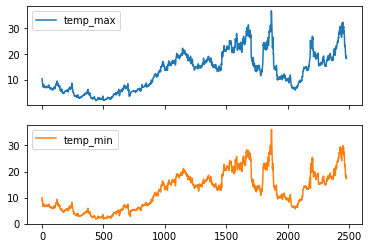

In [ ]:
df.plot(subplots=True)
plt.show()

### Splitting the dataset into Testing and Training Data

In [ ]:
train_temp_max = list(df[0:1800]['temp_max'])
test_temp_max = list(df[1800:]['temp_max'])

In [ ]:
train_temp_min = list(df[0:1800]['temp_min'])
test_temp_min = list(df[1800:]['temp_min'])

### Plotting the training and testing data

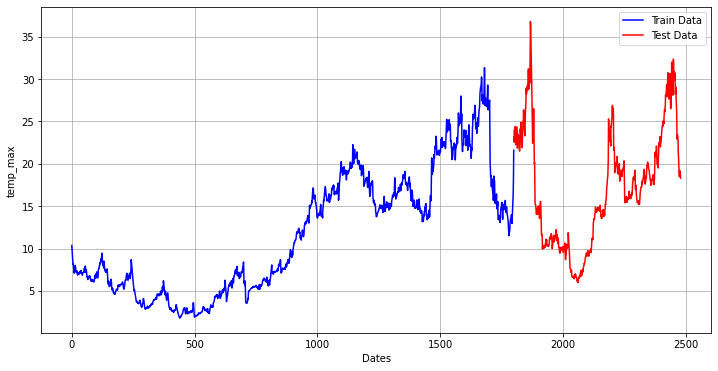

In [ ]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('temp_max')
plt.plot(df[0:1800]['temp_max'],'blue',label='Train Data')
plt.plot(df[1800:]['temp_max'],'red',label='Test Data')
plt.legend()

In [ ]:
model_prediction_max = []
n_test_obser_tmax = len(test_temp_max)

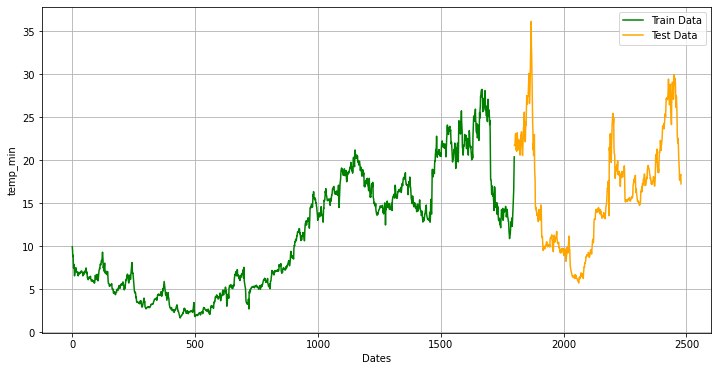

In [ ]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('temp_min')
plt.plot(df[0:1800]['temp_min'],'green',label='Train Data')
plt.plot(df[1800:]['temp_min'],'orange',label='Test Data')
plt.legend()

In [ ]:
model_prediction_min = []
n_test_obser_tmin = len(test_temp_min)

## Fitting the Model

In [ ]:
for i in range(n_test_obser_tmax):
  modelmax = ARIMA(train_temp_max,order =(4,1,0))
  model_max_fit =modelmax.fit()
  output_max = model_max_fit.forecast()
  yhat_max = list(output_max[0])[0]
  model_prediction_max.append(yhat_max)
  actual_test_value_max = test_temp_max[i]
  train_temp_max.append(actual_test_value_max)

In [ ]:
for i in range(n_test_obser_tmin):
  modelmin = ARIMA(train_temp_min,order =(4,1,0))
  model_min_fit =modelmin.fit()
  output_min = model_min_fit.forecast()
  yhat_min = list(output_min[0])[0]
  model_prediction_min.append(yhat_min)
  actual_test_value_min = test_temp_min[i]
  train_temp_min.append(actual_test_value_min)

### Model Summary

In [ ]:
print(model_max_fit.summary2())

                          Results: ARIMA
Model:              ARIMA            BIC:                 3816.3617
Dependent Variable: D.y              Log-Likelihood:      -1884.7  
Date:               2022-06-09 16:08 Scale:               1.0000   
No. Observations:   2477             Method:              css-mle  
Df Model:           5                Sample:              1        
Df Residuals:       2472                                  8        
Converged:          1.0000           S.D. of innovations: 0.518    
No. Iterations:     11.0000          HQIC:                3794.145 
AIC:                3781.4729                                      
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const        0.0034     0.0124    0.2765   0.7822   -0.0209    0.0277
ar.L1.D.y    0.2245     0.0201   11.1723   0.0000    0.1851    0.26

In [ ]:
print(model_min_fit.summary2())

                          Results: ARIMA
Model:              ARIMA            BIC:                 3862.8789
Dependent Variable: D.y              Log-Likelihood:      -1908.0  
Date:               2022-06-09 16:08 Scale:               1.0000   
No. Observations:   2477             Method:              css-mle  
Df Model:           5                Sample:              1        
Df Residuals:       2472                                  8        
Converged:          1.0000           S.D. of innovations: 0.523    
No. Iterations:     11.0000          HQIC:                3840.662 
AIC:                3827.9901                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         0.0034     0.0116    0.2918   0.7705   -0.0194   0.0262
ar.L1.D.y     0.1016     0.0201    5.0595   0.0000    0.0623   0.14

## Plotting the Prediction

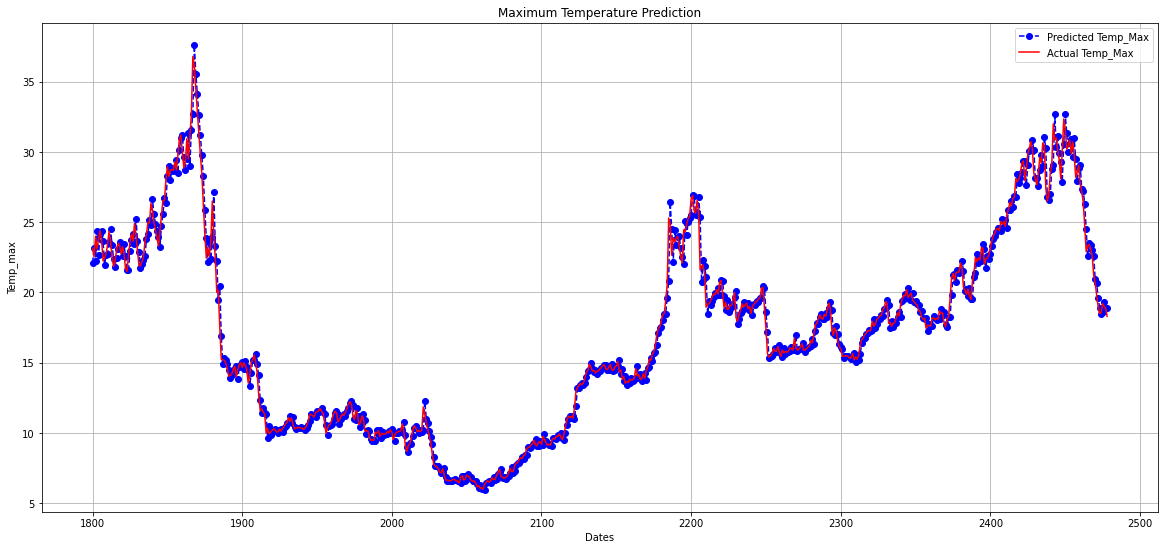

In [ ]:
plt.figure(figsize=(20,9))
plt.grid(True)
date_range = df[1800:].index
plt.plot(date_range, model_prediction_max[:],'blue',marker= 'o',linestyle = 'dashed',label='Predicted Temp_Max')
plt.plot(date_range, test_temp_max, 'red', label='Actual Temp_Max')
plt.title('Maximum Temperature Prediction')
plt.xlabel('Dates')
plt.ylabel('Temp_max')
plt.legend()
plt.show()

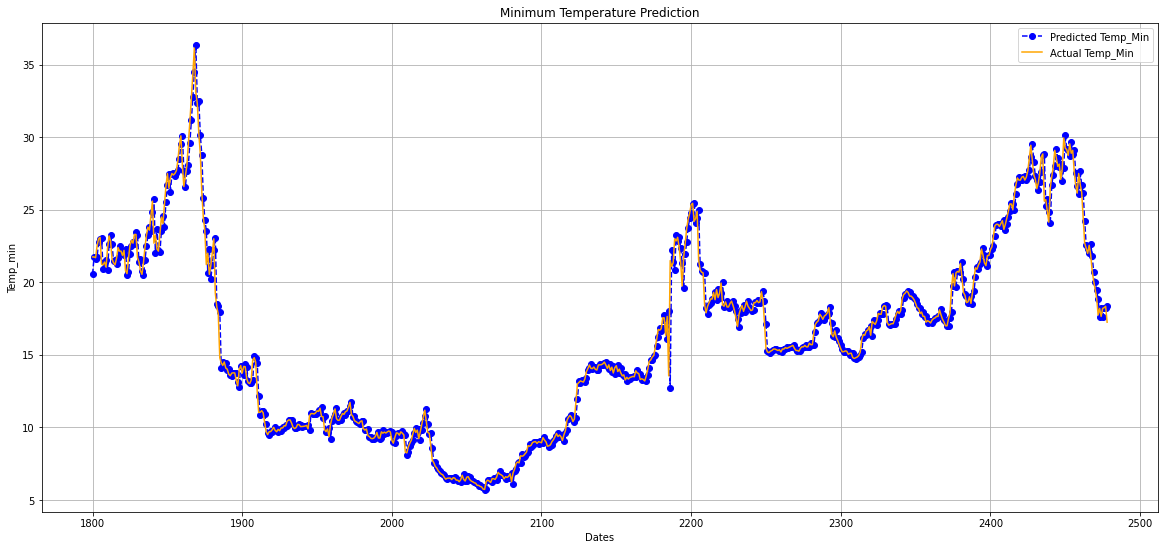

In [ ]:
plt.figure(figsize=(20,9))
plt.grid(True)
date_range = df[1800:].index
plt.plot(date_range, model_prediction_min[:],'blue',marker= 'o',linestyle = 'dashed',label='Predicted Temp_Min')
plt.plot(date_range, test_temp_min, 'orange', label='Actual Temp_Min')
plt.title('Minimum Temperature Prediction')
plt.xlabel('Dates')
plt.ylabel('Temp_min')
plt.legend()
plt.show()

## Mean Absolute Percentage Error (MAPE)

In [ ]:
mape = np.mean(np.abs(np.array(model_prediction_max[:]) - np.array(test_temp_max))/np.abs(test_temp_max))*100 
print('MAPE :'+str(mape))

MAPE :2.6176333192741494


In [ ]:
mape = np.mean(np.abs(np.array(model_prediction_min[:]) - np.array(test_temp_min))/np.abs(test_temp_min))*100
print('MAPE :'+str(mape))

MAPE :2.514732012713032
